# Importing Required Libraries for Data Preparation 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset and Examining Structure

In [2]:
df = pd.read_csv('data/gritdata.csv', delimiter = '\t')
df.head()
# changed delimiter to tab

,country,surveyelapse,GS1,GS2,GS3,GS4,GS5,GS6,GS7,GS8,...,O7,O8,O9,O10,operatingsystem,browser,screenw,screenh,introelapse,testelapse
0,RO,174,1,1,3,3,3,2,3,1,...,5,4,5,4,Windows,Chrome,1366,768,69590,307
1,US,120,2,2,3,3,2,1,3,3,...,4,3,4,5,Macintosh,Chrome,1280,800,33657,134
2,US,99,3,3,3,3,4,3,4,4,...,5,5,4,4,Windows,Firefox,1920,1080,95550,138
3,KE,5098,1,3,4,2,4,1,5,4,...,4,2,5,4,Windows,Chrome,1600,900,4,4440
4,JP,340,1,2,3,3,2,2,2,4,...,4,1,3,2,Windows,Firefox,1920,1080,3,337


In [3]:
df.shape
# (row, col)

(4270, 98)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4270 entries, 0 to 4269
Data columns (total 98 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          4226 non-null   object
 1   surveyelapse     4270 non-null   int64 
 2   GS1              4270 non-null   int64 
 3   GS2              4270 non-null   int64 
 4   GS3              4270 non-null   int64 
 5   GS4              4270 non-null   int64 
 6   GS5              4270 non-null   int64 
 7   GS6              4270 non-null   int64 
 8   GS7              4270 non-null   int64 
 9   GS8              4270 non-null   int64 
 10  GS9              4270 non-null   int64 
 11  GS10             4270 non-null   int64 
 12  GS11             4270 non-null   int64 
 13  GS12             4270 non-null   int64 
 14  VCL1             4270 non-null   int64 
 15  VCL2             4270 non-null   int64 
 16  VCL3             4270 non-null   int64 
 17  VCL4             4270 non-null   

In [5]:
df.isna().sum()

country         44
surveyelapse     0
GS1              0
GS2              0
GS3              0
                ..
browser          0
screenw          0
screenh          0
introelapse      0
testelapse       0
Length: 98, dtype: int64

44 rows in the data have null values in the column "country". We will fill these null values with a placeholder value, "Unknown" so we can retain other information.

In [6]:
df['country'] = df['country'].fillna("Unknown")

In [7]:
df.isna().sum()

country         0
surveyelapse    0
GS1             0
GS2             0
GS3             0
               ..
browser         0
screenw         0
screenh         0
introelapse     0
testelapse      0
Length: 98, dtype: int64

In [8]:
df.duplicated().sum()

0

There are no duplicates in our data.

In [9]:
# getting the columns of gritScore cols (GS1-GS12)
gritColumns = df.iloc[:,2:14].columns
print(gritColumns)

Index(['GS1', 'GS2', 'GS3', 'GS4', 'GS5', 'GS6', 'GS7', 'GS8', 'GS9', 'GS10',
       'GS11', 'GS12'],
      dtype='object')


In [10]:
# summing up the count of all missing data from Grit Scores
GritScoreZeroCount = (df[gritColumns] == 0).sum()
print(GritScoreZeroCount)

GS1     10
GS2     14
GS3     12
GS4     34
GS5     11
GS6     14
GS7     14
GS8     10
GS9      9
GS10    15
GS11    15
GS12    25
dtype: int64


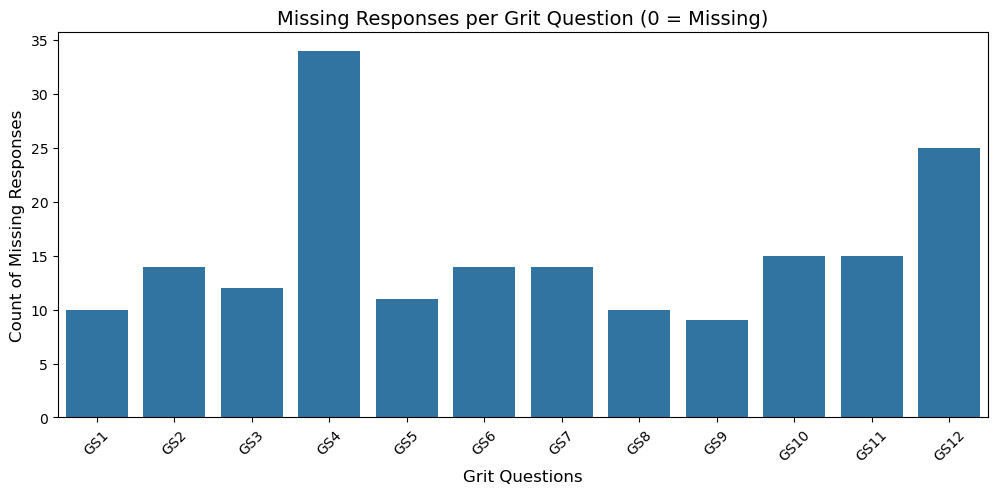

In [25]:
plt.figure(figsize=(12,5))
sns.barplot(x=GritScoreZeroCount.index, y=GritScoreZeroCount.values)
plt.title("Missing Responses per Grit Question (0 = Missing)", fontsize=14)
plt.xlabel("Grit Questions", fontsize=12)
plt.ylabel("Count of Missing Responses", fontsize=12)
plt.xticks(rotation=45)
plt.show()


Thesee are the amount of missing grit scores

In [11]:
# getting the columns of the Big 5 Personality Test 
bigPersonalities = df.iloc[:,42:92].columns
print(bigPersonalities)

Index(['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2',
       'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4',
       'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8',
       'O9', 'O10'],
      dtype='object')


In [26]:
len(bigPersonalities)

50

In [12]:
# summing up the count of all missing data from Big 5 Personality Test
bigPersonalitiesZeroCount = (df[bigPersonalities] == 0).sum()
print(bigPersonalitiesZeroCount)

E1      9
E2      9
E3     10
E4     18
E5     17
E6      6
E7     20
E8      5
E9      9
E10     5
N1      9
N2     12
N3     10
N4     18
N5      7
N6     13
N7     13
N8     11
N9      9
N10    13
A1     10
A2     13
A3      9
A4     15
A5     12
A6     19
A7      8
A8      9
A9      8
A10    15
C1     12
C2     13
C3      7
C4     15
C5     11
C6     12
C7      9
C8     17
C9     11
C10    21
O1      9
O2     17
O3     17
O4     17
O5     10
O6     18
O7     13
O8     11
O9     12
O10    15
dtype: int64


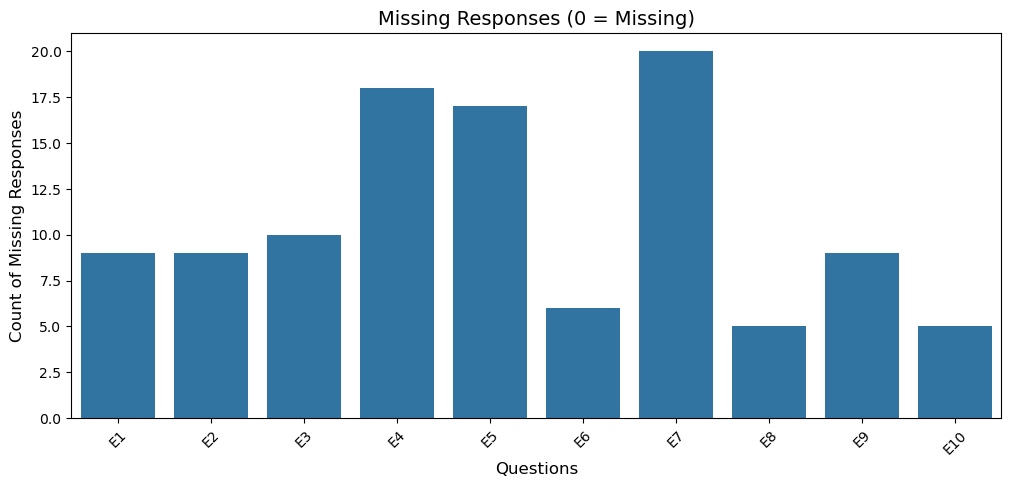

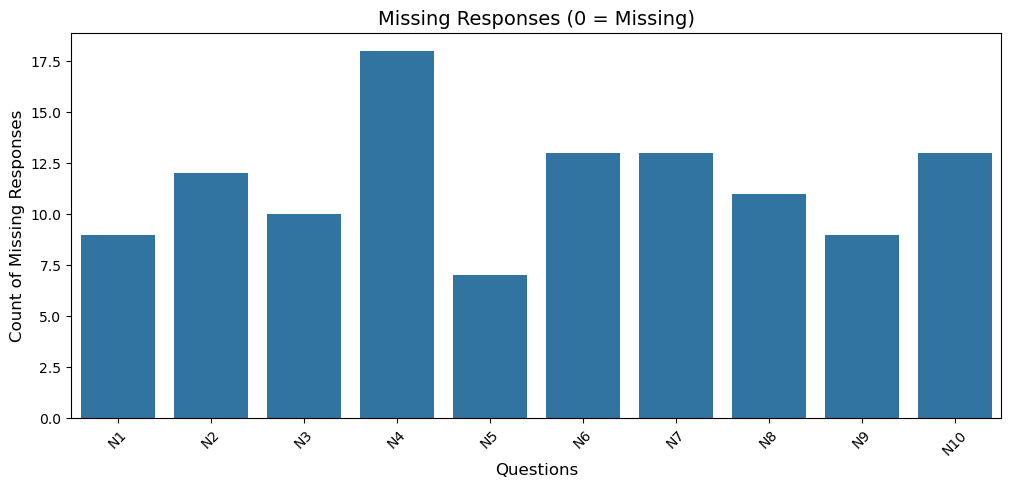

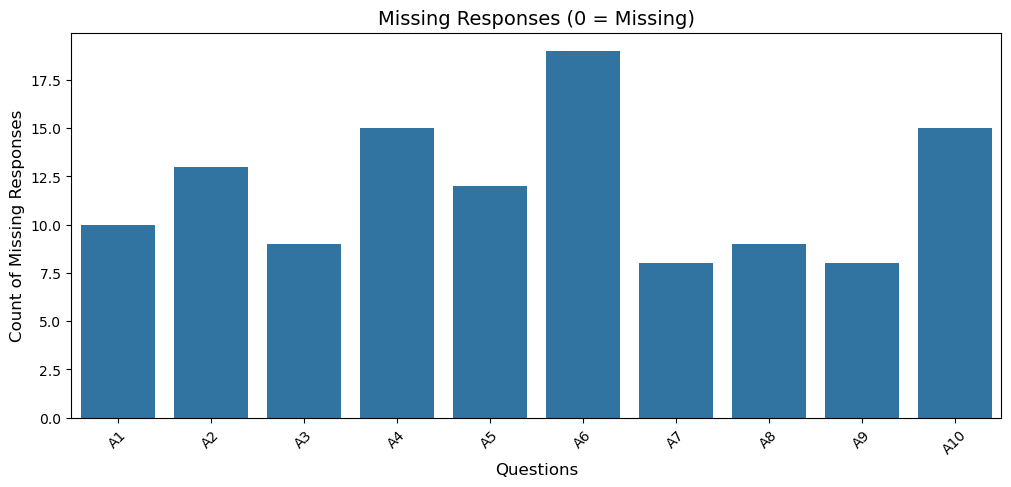

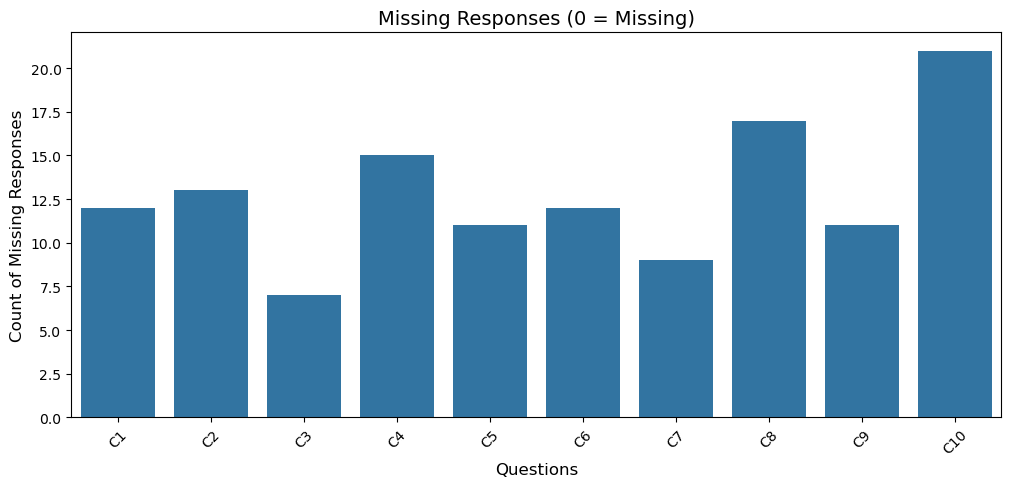

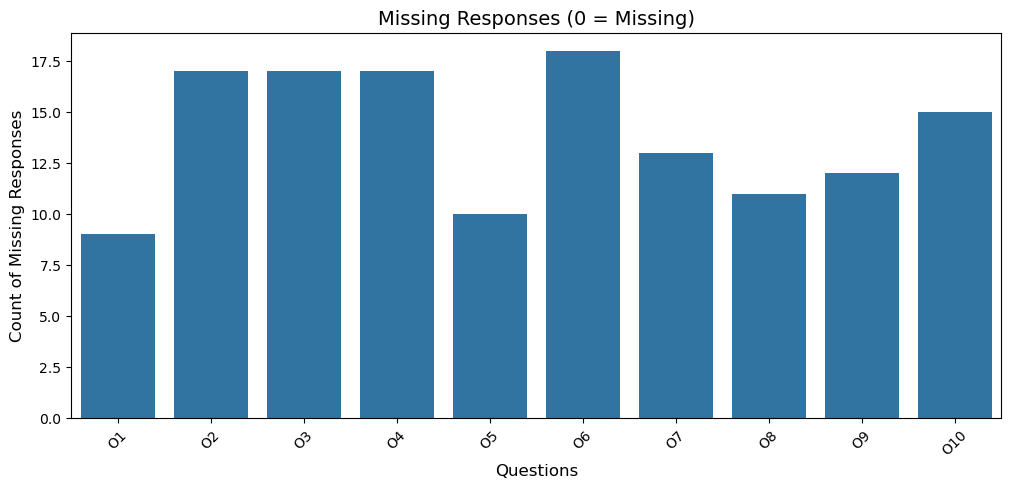

In [ ]:
for i in range(0, 50, 10):
    current = bigPersonalitiesZeroCount.iloc[i: i+10]
    plt.figure(figsize=(12,5))
    sns.barplot(x=current.index, y=current.values)
    plt.title("Missing Responses (0 = Missing)", fontsize=14)
    plt.xlabel("Questions", fontsize=12)
    plt.ylabel("Count of Missing Responses", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

## Completeness Check 

In [14]:
completeness = (df != 0).sum() / (len(df))

completeness_df = pd.DataFrame({
    'BigPersonalities': bigPersonalitiesZeroCount,
    'GritScore': GritScoreZeroCount, 
    'MissingCountries': (df['country'] == 'Unknown').sum(),
    'NonMissingCounts': (df != 0).sum(),
    'CompletenessRate': completeness.round(3)
})

In [22]:
completeness_df[completeness_df['GritScore'].notna()]

,BigPersonalities,GritScore,MissingCountries,NonMissingCounts,CompletenessRate
GS1,NaN,10.0,44,4260,0.998
GS10,NaN,15.0,44,4255,0.996
GS11,NaN,15.0,44,4255,0.996
GS12,NaN,25.0,44,4245,0.994
GS2,NaN,14.0,44,4256,0.997
GS3,NaN,12.0,44,4258,0.997
GS4,NaN,34.0,44,4236,0.992
GS5,NaN,11.0,44,4259,0.997
GS6,NaN,14.0,44,4256,0.997
GS7,NaN,14.0,44,4256,0.997


### Filling in zero values with median values within that column and we are not using mean to avoid outliers

In [34]:
print(int(df['GS1'].median()))

2


In [38]:
for i in GritScoreZeroCount.index:
    value = int(df[i].median())
    df[i] = df[i].replace(0, value)

In [39]:
GritScoreZeroCount = (df[gritColumns] == 0).sum()
print(GritScoreZeroCount)

GS1     0
GS2     0
GS3     0
GS4     0
GS5     0
GS6     0
GS7     0
GS8     0
GS9     0
GS10    0
GS11    0
GS12    0
dtype: int64


In [40]:
for i in bigPersonalitiesZeroCount.index:
    value = int(df[i].median())
    df[i] = df[i].replace(0, value)

In [41]:
bigPersonalitiesZeroCount = (df[bigPersonalities] == 0).sum()
print(bigPersonalitiesZeroCount)

E1     0
E2     0
E3     0
E4     0
E5     0
E6     0
E7     0
E8     0
E9     0
E10    0
N1     0
N2     0
N3     0
N4     0
N5     0
N6     0
N7     0
N8     0
N9     0
N10    0
A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
C1     0
C2     0
C3     0
C4     0
C5     0
C6     0
C7     0
C8     0
C9     0
C10    0
O1     0
O2     0
O3     0
O4     0
O5     0
O6     0
O7     0
O8     0
O9     0
O10    0
dtype: int64
